In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]


In [3]:
A.extend(B)

In [4]:
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [5]:
fuel = pd.read_csv(r'C:\Users\VictorAdeife\Documents\Dataset\fuel_ferc1.csv')

In [6]:
fuel.head(2)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120


What fuel type code has the lowest average fuel cost per unit burned?

In [7]:
fuel.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values(ascending=False).tail(1)

fuel_type_code_pudl
gas    13.659397
Name: fuel_cost_per_unit_burned, dtype: float64

Question 4

What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [8]:
fuel.fuel_mmbtu_per_unit.describe()['75%']

17.006

In [9]:
np.round(np.std(fuel.fuel_mmbtu_per_unit, ddof=2), 2)

10.6

In [10]:
np.round(np.percentile(fuel.fuel_mmbtu_per_unit, 75),2)

17.01

What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

In [11]:
np.round(scipy.stats.skew(fuel.fuel_qty_burned), 2)

15.85

In [12]:
np.round(scipy.stats.kurtosis(fuel.fuel_qty_burned), 2)

651.26

Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?

In [13]:
fuel.isna().sum().sort_values(ascending = False).head(1)

fuel_unit    180
dtype: int64

In [14]:
missing_values = fuel.isna().sum()['fuel_unit']

In [15]:
total_values = len(fuel.fuel_unit)

In [16]:
percent_missing = np.round(missing_values/total_values, 3)
percent_missing

0.006

In [17]:
corr =  fuel.corr()   #['fuel_cost_per_unit_burned'].sort_values
corr['fuel_cost_per_unit_burned'].sort_values()

utility_id_ferc1               -0.037863
fuel_qty_burned                -0.018535
fuel_mmbtu_per_unit            -0.010034
fuel_cost_per_mmbtu            -0.000437
fuel_cost_per_unit_delivered    0.011007
report_year                     0.013599
fuel_cost_per_unit_burned       1.000000
Name: fuel_cost_per_unit_burned, dtype: float64

<AxesSubplot:>

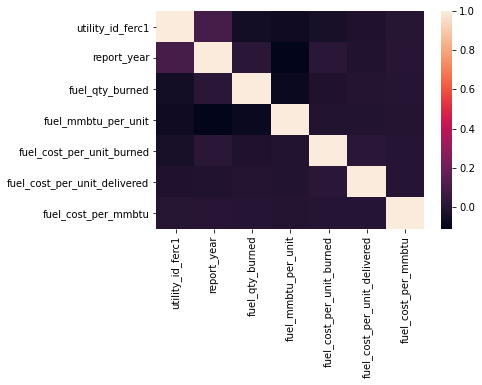

In [18]:
sns.heatmap(corr)

fuel_mmbtu_per_unit            -0.010034

fuel_cost_per_unit_delivered    0.011007

For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [19]:
year_98 = fuel.groupby('report_year')['fuel_cost_per_unit_burned'].sum()[1998]

In [20]:
year_94 = fuel.groupby('report_year')['fuel_cost_per_unit_burned'].sum()[1994]

In [21]:
percentage_change = ((year_94 - year_98) / year_94) * 100
percentage_change 

46.73647708743574

Which year has the highest average fuel cost per unit delivered?

In [22]:
fuel.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False).head(1)

report_year
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64